# PCA (Principal Component Analysis)

Aunque PCA no es un modelo de clustering, es una técnica de reducción de dimensionalidad que transforma las variables originales en un nuevo conjunto de variables no correlacionadas (componentes principales). Puede ser útil para visualizar y explorar la estructura de los datos meteorológicos.

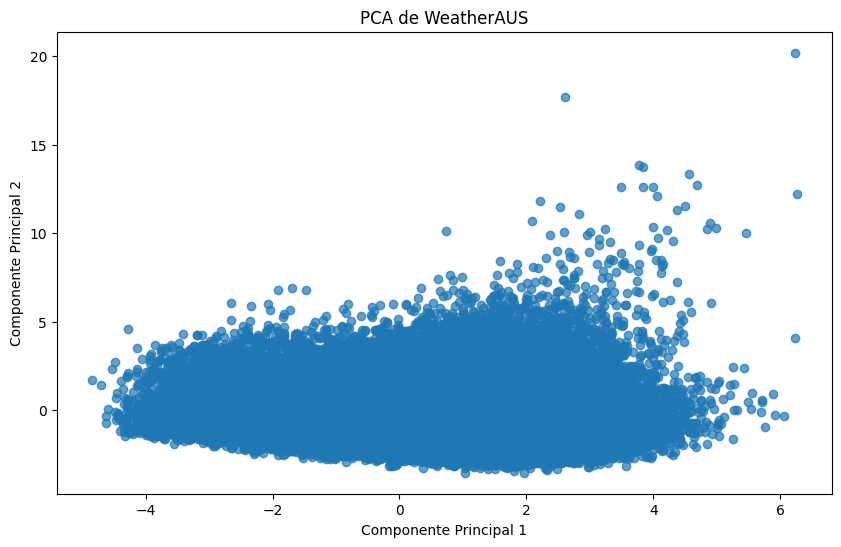

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos WeatherAUS
data = pd.read_csv('../dataset/weatherAUS.csv')

# Preprocesamiento de Datos
# Seleccionar columnas numéricas relevantes
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'WindSpeed9am', 'WindSpeed3pm']
data = data[selected_columns]

# Imputar valores faltantes con la media de la columna
data = data.fillna(data.mean())

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
pca_result = pca.fit_transform(data_scaled)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Visualización de los Componentes Principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.7)
plt.title('PCA de WeatherAUS')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


## Interpretación del Gráfico de PCA

### Componentes Principales:

* PCA transforma las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales.
* En este gráfico, estamos visualizando los datos en términos de las dos primeras componentes principales (PCA1 y PCA2).

### Ejes del Gráfico:

* El eje X representa la primera componente principal (PCA1).
* El eje Y representa la segunda componente principal (PCA2).
* Estas componentes son combinaciones lineales de las variables originales que explican la mayor parte de la variabilidad en los datos.

### Distribución de los Puntos:

* Cada punto en el gráfico representa una observación (un registro del conjunto de datos original).
* La dispersión de los puntos muestra la variabilidad de los datos en las nuevas dimensiones de PCA.

### Interpretación de la Varianza:

* Los componentes principales están ordenadas por la cantidad de varianza que explican en los datos originales.
* PCA1 explica la mayor parte de la varianza, seguida de PCA2.
* Podemos revisar la varianza explicada por cada componente utilizando el atributo explained_variance_ratio_ del objeto PCA.


## Evaluación de la Varianza Explicada
Para entender cuánta varianza explica cada componente, vamos a mirar la varianza explicada:

In [3]:
print(f'Varianza explicada por PCA1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por PCA2: {pca.explained_variance_ratio_[1]:.2f}')


Varianza explicada por PCA1: 0.32
Varianza explicada por PCA2: 0.23


### Explicación de la varianza explicada

#### Varianza Explicada por PCA1: 0.32

* Valor: 0.32 (32%)
* Significado:
    * La primera componente principal (PCA1) explica el 32% de la variabilidad total presente en los datos originales.
    * Esto significa que si proyectamos los datos originales sobre la primera componente principal, aproximadamente un tercio de la información (o varianza) contenida en los datos originales se conserva.

#### Varianza Explicada por PCA2: 0.23

* Valor: 0.23 (23%)
* Significado:
    * La segunda componente principal (PCA2) explica el 23% de la variabilidad total presente en los datos originales.
    * Esto significa que al agregar esta segunda componente, estamos capturando un 23% adicional de la variabilidad total.

#### Interpretación Combinada

* Varianza Total Explicada por las dos primeras componentes:
    * La suma de la varianza explicada por PCA1 y PCA2 es 0.32 + 0.23 = 0.55 (55%).
    * Esto significa que las dos primeras componentes principales juntas explican el 55% de la variabilidad total de los datos originales.
    * En otras palabras, más de la mitad de la información contenida en los datos originales puede ser representada utilizando solo estas dos nuevas dimensiones (PCA1 y PCA2).



### Gráfico de PCA

En el gráfico generado de PCA, donde cada punto representa una observación proyectada en el espacio de las dos primeras componentes principales:

1. Dispersión de los Puntos:
    * La dispersión de los puntos a lo largo de PCA1 y PCA2 muestra cómo las observaciones varían con respecto a estas dos dimensiones principales.
    * Una gran dispersión indica alta variabilidad en esa dirección, mientras que una dispersión menor indica menor variabilidad.
1. Información Conservada:
    * Aunque estamos utilizando solo dos componentes, estamos reteniendo el 55% de la varianza total de los datos originales.
    * Esto suele ser suficiente para visualizar y explorar las estructuras subyacentes de los datos de manera efectiva.
1. Reducción de Dimensionalidad:
    * Pasar de un espacio de 7 dimensiones (original) a un espacio de 2 dimensiones (PCA) facilita la visualización y puede ayudar a identificar patrones y relaciones que no son obvios en el espacio original de mayor dimensión.

## Evaluación Adicional

Para una evaluación más completa, podrías observar la varianza explicada por todas las componentes principales y determinar cuántas componentes necesitas para capturar un umbral deseado de la varianza total (por ejemplo, 90%). Esto se puede hacer mediante una gráfica de codo (elbow plot) de la varianza explicada acumulada.

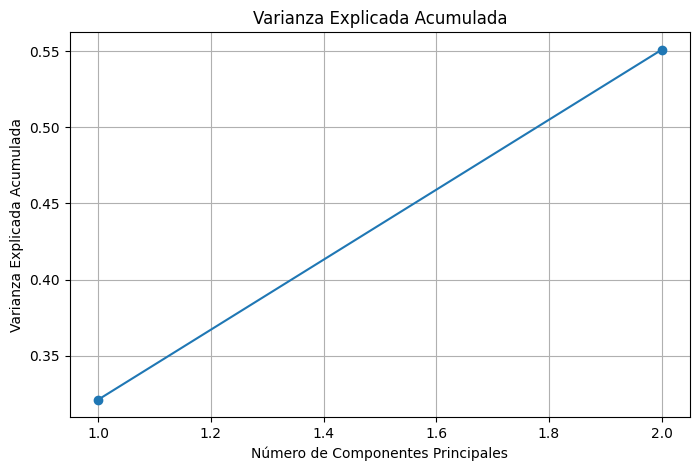

In [4]:
# Varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()


## Consideraciones Adicionales

### Estandarización de los Datos:

* Es crucial estandarizar los datos antes de aplicar PCA, ya que PCA es sensible a las escalas de las variables originales.
* La estandarización asegura que cada variable contribuya de manera equitativa a las componentes principales.

### Número de Componentes:

* En este ejemplo, hemos reducido los datos a 2 componentes principales para visualización.
* Puedes ajustar el número de componentes según tus necesidades y analizar más componentes si es necesario.

## Conclusión

PCA es una técnica poderosa para reducir la dimensionalidad y visualizar la estructura subyacente de los datos. La interpretación del gráfico de PCA implica entender cómo las observaciones se distribuyen en el espacio de las nuevas componentes principales y cómo estas componentes explican la variabilidad en los datos originales. Esta técnica puede ayudarte a descubrir patrones y relaciones en los datos meteorológicos del conjunto de datos WeatherAUS.